In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def display (img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [30]:
reeses=cv2.imread('../DATA/reeses_puffs.png',0)

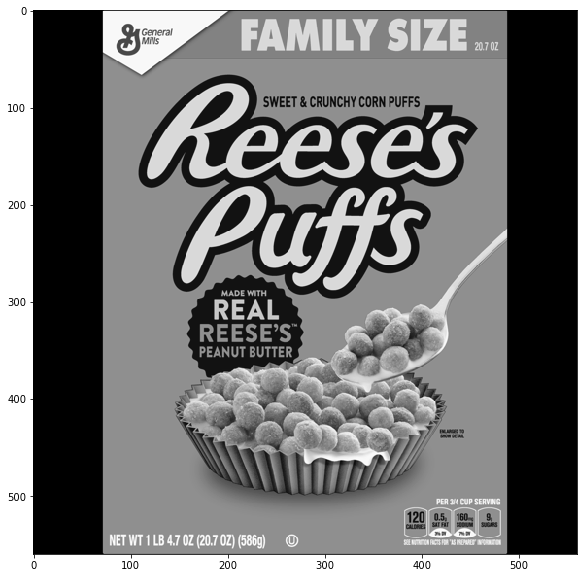

In [31]:
display(reeses)

In [32]:
cereals=cv2.imread('../DATA/many_cereals.jpg',0)

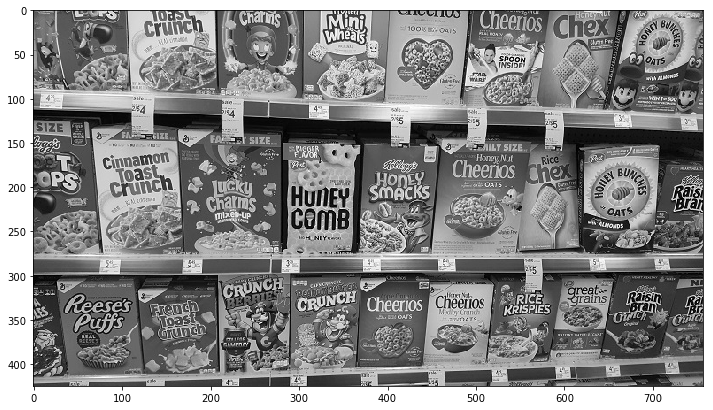

In [33]:
display(cereals)

In [8]:
# BRUTE FORCE DETECTION (ORB)
orb = cv2.ORB_create()

In [10]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)

In [12]:
matches=sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

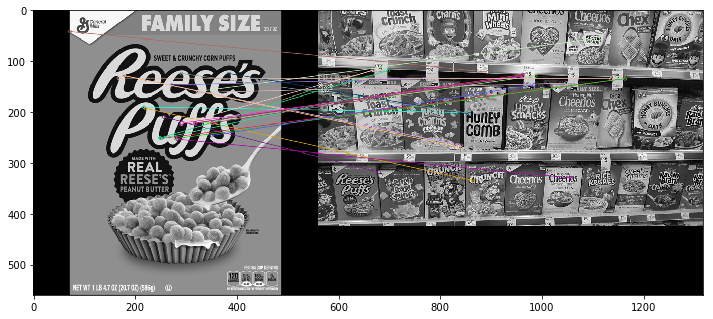

In [15]:
display(reeses_matches)

In [16]:
#SIFT BRUTE FORCE---------------------------------
#bom pra variação de tamanhos

In [34]:
sift = cv2.xfeatures2d.SIFT_create()

In [43]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [44]:
bf = cv2.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

In [45]:
# RATIO TEST
# DISTANCIA MENOR = MELHOR O MATCH
good=[]
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [46]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

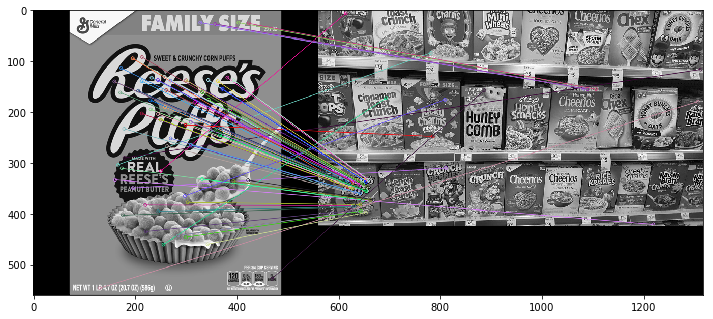

In [47]:
display(sift_matches)

In [48]:
len(good)

78

In [49]:
len(matches)

1500

In [50]:
#FLAN BASE MATCHES

In [61]:
sift = cv2.xfeatures2d.SIFT_create()

In [62]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [63]:
#DEFINE FLANN - FASTER THAN BRUTE FORCE
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [64]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [65]:
matches=flann.knnMatch(des1,des2,k=2)

In [67]:
matchesMask = [[0,0] for i in range(len(matches))]

In [68]:

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i]=[1,0]

In [69]:
draw_params = dict(matchColor=(0,255,0),
                    singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [72]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

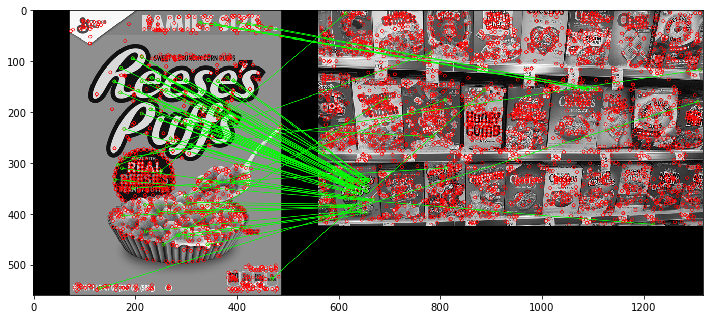

In [73]:
display(flann_matches)